<a href="https://colab.research.google.com/github/Nithiya30/AAI-lab1/blob/main/aai%20laab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving heart.xlsx to heart (2).xlsx
Dataset shape: (303, 14)
X shape: (303, 13)
y shape: (303,)
Class 0 count: 138
Class 1 count: 165
X_train: (242, 13)
X_test : (61, 13)
y_train: (242,)
y_test : (61,)

Confusion Matrix:
 [[20  7]
 [ 3 31]]


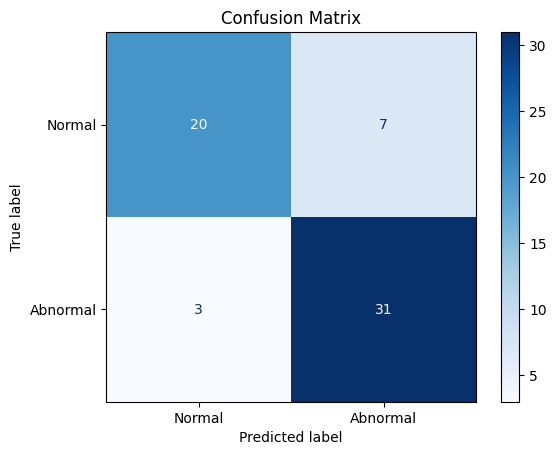

Accuracy : 83.60655737704919
Precision: 81.57894736842105
Recall   : 91.17647058823529
F1 Score : 86.11111111111111
ROC AUC Score: 0.8262527233115468


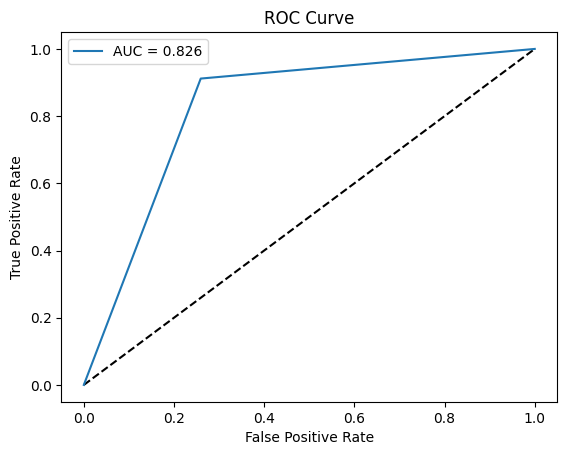

              precision    recall  f1-score   support

      Normal       0.87      0.74      0.80        27
    Abnormal       0.82      0.91      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



In [4]:

from google.colab import files
files.upload()   # Upload heart.xlsx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score,
    recall_score, f1_score,
    roc_curve, auc, roc_auc_score,
    classification_report
)
df = pd.read_excel('heart.xlsx')
print("Dataset shape:", df.shape)
X = df.drop(columns=['output'])
y = df['output']

print("X shape:", X.shape)
print("y shape:", y.shape)

unique_values = np.unique(y)
for value in unique_values:
    print(f"Class {value} count:", np.count_nonzero(y == value))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

classes = ["Normal", "Abnormal"]
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

print("Accuracy :", accuracy_score(y_test, y_pred) * 100)
print("Precision:", precision_score(y_test, y_pred) * 100)
print("Recall   :", recall_score(y_test, y_pred) * 100)
print("F1 Score :", f1_score(y_test, y_pred) * 100)

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc_val = auc(fpr, tpr)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC = %.3f' % roc_auc_val)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

print(classification_report(y_test, y_pred, target_names=classes))
